In [1]:
import os
import pandas as pd

output_folder = 'AIzymes_IC50'
os.makedirs(output_folder, exist_ok=True)

data = {
    'NQEFT': {"filename": "Landscapes_CAZ_NQEFT", "residues": [76, 124, 132, 156, 243]},
    'AFST':  {"filename": "Landscapes_CAZ_AFST", "residues": [33, 72, 212, 213]},
    'LFLI':  {"filename": "Landscapes_CAZ_LFLI", "residues": [67, 142, 158, 215]}
}

reference_seq = 'OXA48.seq' 
with open(f'{output_folder}/{reference_seq}', 'r') as f:
    reference_sequence = f.read().strip()

# Process .csv files
for landscape in data:
    df = pd.read_csv(f'{output_folder}/{data[landscape]["filename"]}.csv')
    for idx, row in df.iterrows():
        new_sequence = list(reference_sequence)  
        for mut_idx, residue in enumerate(data[landscape]["residues"]):
            new_sequence[residue-1] = row['mutations'][mut_idx] 
        df.at[idx, 'sequence'] = ''.join(new_sequence)
        df.at[idx, 'landscape'] = landscape

    df.to_csv(f'{output_folder}/{data[landscape]["filename"]}_updated.csv', index=False)

display(df)

,mutations,IC50,sequence,landscape
0,LFLI,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI
1,LFLT,0.014,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI
2,LFPI,0.035,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI
3,LFPT,0.029,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI
4,LLLI,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI
5,LLLT,0.012,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI
6,LLPI,0.046,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI
7,LLPT,0.030,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI
8,IFLI,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI
9,IFLT,0.014,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI


In [2]:
%run src/plm_trainer_multi_small.py

df_path = [f'{output_folder}/{data[landscape]["filename"]}_updated.csv' for landscape in data]
#df_path = f'{output_folder}/{data["AFST"]["filename"]}_updated.csv'
scores          = ['IC50']

dataset = PLM_trainer(
    output_folder   = output_folder,
    verbose         = False
    )

PLM_trainer.load_dataset(    
    dataset,            
    df_path         = df_path,
    scores          = scores,
    labels          = [],
    select_unique   = False,
    normalize       = 'minmax'
    )

C:\Users\bunzelh\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### PLM trainer loaded. ###
Loading dataset: AIzymes_IC50/Landscapes_CAZ_NQEFT_updated.csv
Loading dataset: AIzymes_IC50/Landscapes_CAZ_AFST_updated.csv
Loading dataset: AIzymes_IC50/Landscapes_CAZ_LFLI_updated.csv
### 3 files loaded into one dataset. ###
### Data normalized. ###


### PLM trainer loaded. ###
train_df


,mutations,IC50,sequence,landscape,norm_IC50
15,NHKDP,0.296,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.566866
11,NHEDP,0.159,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.293413
16,TQEFT,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.001996
39,ALAA,0.389,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.752495
47,VLAA,0.513,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,1.000000
41,VFSA,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,0.005988
38,ALAT,0.140,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.255489
33,AFSA,0.012,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.000000
42,VFAT,0.014,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,0.003992
27,THEDP,0.430,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.834331


test_df


,mutations,IC50,sequence,landscape,norm_IC50
48,LFLI,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.001996
30,THKDT,0.166,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.307385
23,TQKDP,0.122,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.219561
2,NQEDT,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
58,IFPI,0.126,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.227545
56,IFLI,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.005988
37,ALSA,0.177,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.329341
34,AFAT,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.005988
17,TQEFP,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
24,THEFT,0.062,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.099800


100%|██████████| 500/500 [52:36<00:00,  6.31s/it]


PLM facebook/esm2_t6_8M_UR50D trained for norm_IC50


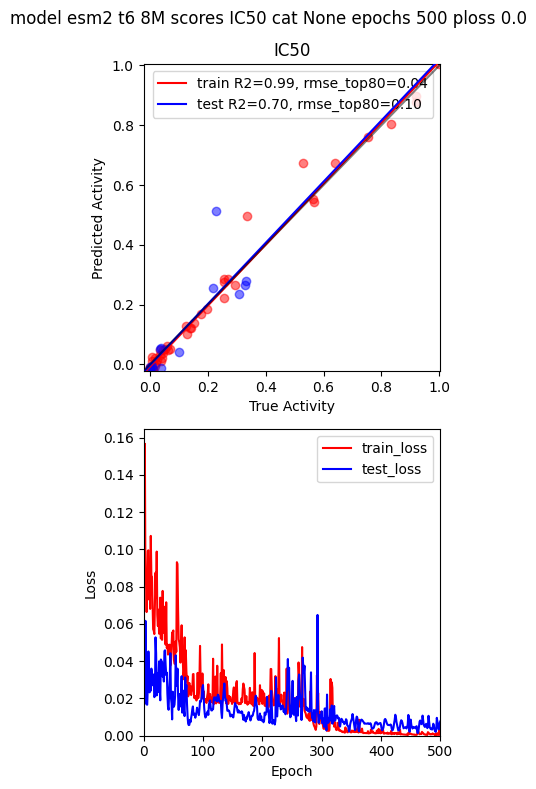

train_df


,mutations,IC50,sequence,landscape,norm_IC50
15,NHKDP,0.296,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.566866
11,NHEDP,0.159,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.293413
16,TQEFT,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.001996
39,ALAA,0.389,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.752495
47,VLAA,0.513,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,1.000000
41,VFSA,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,0.005988
38,ALAT,0.140,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.255489
33,AFSA,0.012,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.000000
42,VFAT,0.014,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,0.003992
27,THEDP,0.430,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.834331


test_df


,mutations,IC50,sequence,landscape,norm_IC50
48,LFLI,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.001996
30,THKDT,0.166,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.307385
23,TQKDP,0.122,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.219561
2,NQEDT,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
58,IFPI,0.126,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.227545
56,IFLI,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.005988
37,ALSA,0.177,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.329341
34,AFAT,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.005988
17,TQEFP,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
24,THEFT,0.062,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.099800


100%|██████████| 500/500 [55:14<00:00,  6.63s/it]


PLM facebook/esm2_t6_8M_UR50D trained for norm_IC50


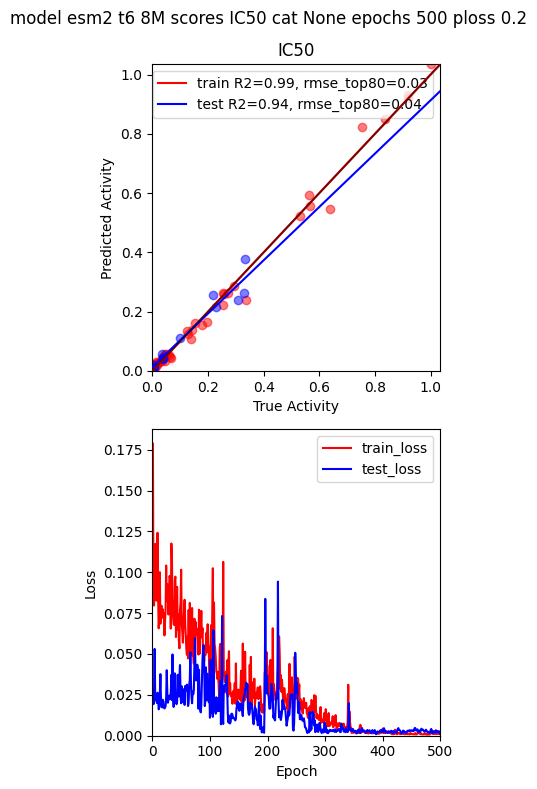

train_df


,mutations,IC50,sequence,landscape,norm_IC50
15,NHKDP,0.296,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.566866
11,NHEDP,0.159,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.293413
16,TQEFT,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.001996
39,ALAA,0.389,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.752495
47,VLAA,0.513,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,1.000000
41,VFSA,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,0.005988
38,ALAT,0.140,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.255489
33,AFSA,0.012,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.000000
42,VFAT,0.014,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,0.003992
27,THEDP,0.430,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.834331


test_df


,mutations,IC50,sequence,landscape,norm_IC50
48,LFLI,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.001996
30,THKDT,0.166,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.307385
23,TQKDP,0.122,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.219561
2,NQEDT,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
58,IFPI,0.126,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.227545
56,IFLI,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.005988
37,ALSA,0.177,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.329341
34,AFAT,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.005988
17,TQEFP,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
24,THEFT,0.062,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.099800


100%|██████████| 500/500 [53:13<00:00,  6.39s/it]


PLM facebook/esm2_t6_8M_UR50D trained for norm_IC50


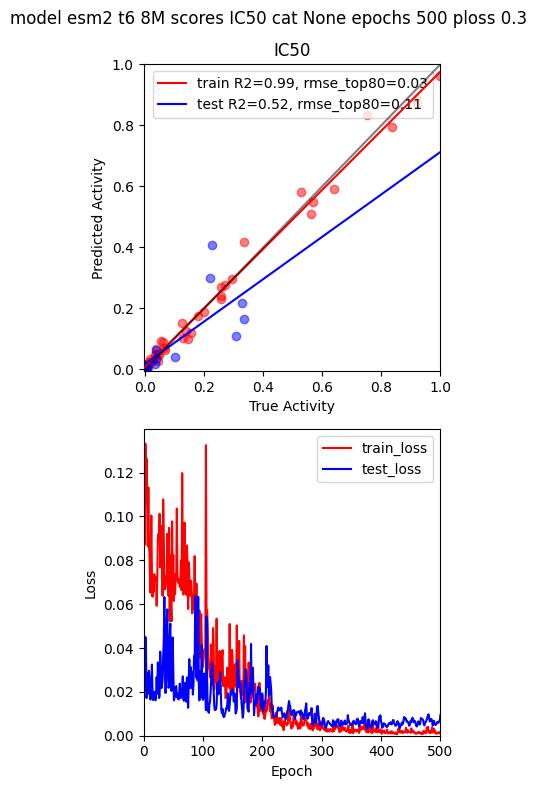

train_df


,mutations,IC50,sequence,landscape,norm_IC50
15,NHKDP,0.296,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.566866
11,NHEDP,0.159,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.293413
16,TQEFT,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.001996
39,ALAA,0.389,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.752495
47,VLAA,0.513,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,1.000000
41,VFSA,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,0.005988
38,ALAT,0.140,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.255489
33,AFSA,0.012,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.000000
42,VFAT,0.014,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,0.003992
27,THEDP,0.430,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.834331


test_df


,mutations,IC50,sequence,landscape,norm_IC50
48,LFLI,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.001996
30,THKDT,0.166,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.307385
23,TQKDP,0.122,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.219561
2,NQEDT,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
58,IFPI,0.126,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.227545
56,IFLI,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.005988
37,ALSA,0.177,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.329341
34,AFAT,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.005988
17,TQEFP,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
24,THEFT,0.062,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.099800


100%|██████████| 500/500 [55:29<00:00,  6.66s/it]


PLM facebook/esm2_t6_8M_UR50D trained for norm_IC50


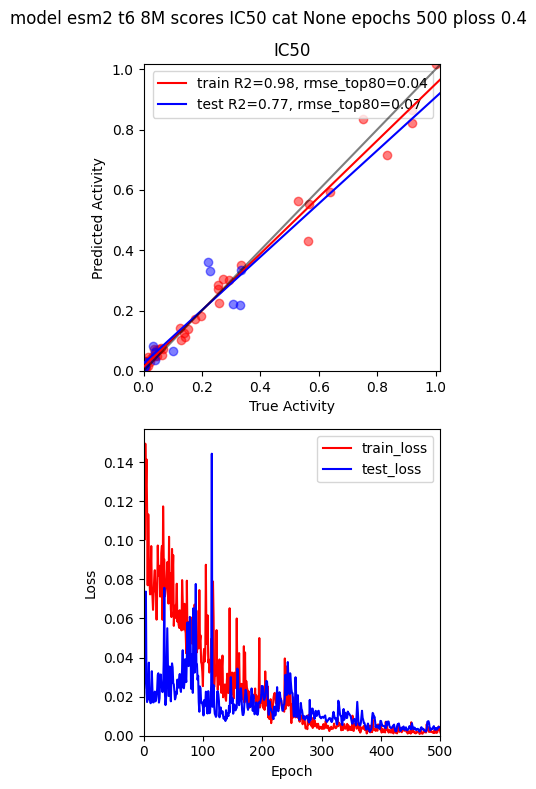

train_df


,mutations,IC50,sequence,landscape,norm_IC50
15,NHKDP,0.296,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.566866
11,NHEDP,0.159,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.293413
16,TQEFT,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.001996
39,ALAA,0.389,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.752495
47,VLAA,0.513,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,1.000000
41,VFSA,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,0.005988
38,ALAT,0.140,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.255489
33,AFSA,0.012,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.000000
42,VFAT,0.014,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,AFST,0.003992
27,THEDP,0.430,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.834331


test_df


,mutations,IC50,sequence,landscape,norm_IC50
48,LFLI,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.001996
30,THKDT,0.166,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.307385
23,TQKDP,0.122,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.219561
2,NQEDT,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
58,IFPI,0.126,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.227545
56,IFLI,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.005988
37,ALSA,0.177,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.329341
34,AFAT,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,AFST,0.005988
17,TQEFP,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
24,THEFT,0.062,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.099800


 71%|███████   | 355/500 [38:43<15:48,  6.54s/it]  


KeyboardInterrupt: 

In [3]:
%run src/plm_trainer_multi_small.py

for p_loss in [0.0,0.2,0.3,0.4,0.5]:

    PLM_trainer.train_PLM( 
        dataset,
        epochs          = 500,
        esm2_model_name = "facebook/esm2_t6_8M_UR50D",
        p_loss          = p_loss,
        liveplot        = False,
        overwrite       = True,
        print_testtrain = True,
        validation      = "test_train",
        figure_name     = f'all_data_test_ploss{p_loss}'
    )

train_df


,mutations,IC50,sequence,norm_IC50
15,NHKDP,0.296,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.566866
11,NHEDP,0.159,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.293413
16,TQEFT,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.001996
39,ALAA,0.389,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.752495
47,VLAA,0.513,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,1.000000
41,VFSA,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.005988
38,ALAT,0.140,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.255489
33,AFSA,0.012,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.000000
42,VFAT,0.014,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.003992
27,THEDP,0.430,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.834331


test_df


,mutations,IC50,sequence,norm_IC50
48,LFLI,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.001996
30,THKDT,0.166,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.307385
23,TQKDP,0.122,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.219561
2,NQEDT,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.037924
58,IFPI,0.126,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.227545
56,IFLI,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.005988
37,ALSA,0.177,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.329341
34,AFAT,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.005988
17,TQEFP,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.037924
24,THEFT,0.062,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.099800


100%|██████████| 200/200 [24:06<00:00,  7.23s/it]


PLM facebook/esm2_t6_8M_UR50D trained for norm_IC50


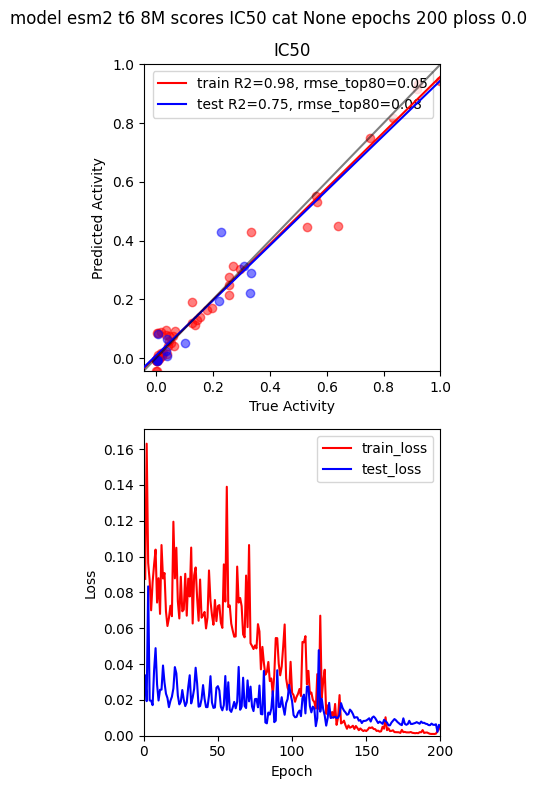

In [ ]:
%run src/plm_trainer_multi_small.py

PLM_trainer.train_PLM( 
    dataset,
    epochs          = 200,
    esm2_model_name = "facebook/esm2_t6_8M_UR50D",
    p_loss          = 0.2,
    liveplot        = False,
    overwrite       = True,
    print_testtrain = True,
    validation      = "test_train",
    figure_name     = 'all_data_0.5'
)

### PLM trainer loaded. ###
train_df


,mutations,IC50,sequence,landscape,norm_IC50
0,NQEFT,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.001996
1,NQEFP,0.018,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.011976
2,NQEDT,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
3,NQEDP,0.075,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.125749
4,NQKFT,0.012,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.000000
5,NQKFP,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.005988
6,NQKDT,0.042,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.059880
7,NQKDP,0.140,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.255489
8,NHEFT,0.031,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.037924
9,NHEFP,0.076,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,NQEFT,0.127745


test_df


,mutations,IC50,sequence,landscape,norm_IC50
48,LFLI,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.001996
49,LFLT,0.014,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.003992
50,LFPI,0.035,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.045908
51,LFPT,0.029,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.033932
52,LLLI,0.013,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.001996
53,LLLT,0.012,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.000000
54,LLPI,0.046,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.067864
55,LLPT,0.030,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.035928
56,IFLI,0.015,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.005988
57,IFLT,0.014,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,LFLI,0.003992


100%|██████████| 200/200 [17:07<00:00,  5.14s/it]


PLM facebook/esm2_t6_8M_UR50D trained for norm_IC50


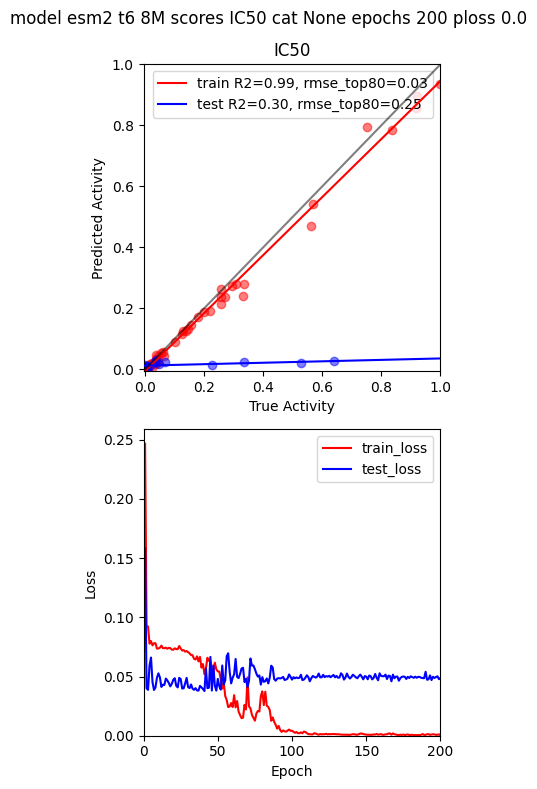

EOFError: Ran out of input

In [ ]:
%run src/plm_trainer_multi_small.py

PLM_trainer.train_PLM( 
    dataset,
    epochs          = 200,
    esm2_model_name = "facebook/esm2_t6_8M_UR50D",
    p_loss          = 0.,
    liveplot        = False,
    overwrite       = True,
    print_testtrain = True,
    validation      = "landscape",
    validation_landscape = 'LFLI',
    figure_name     = 'test_set_LFLI'
)


PLM_trainer.train_PLM( 
    dataset,
    epochs          = 200,
    esm2_model_name = "facebook/esm2_t6_8M_UR50D",
    p_loss          = 0.,
    liveplot        = False,
    overwrite       = True,
    print_testtrain = True,
    validation      = "landscape",
    validation_landscape = 'AFST',
    figure_name     = 'test_set_AFST'
)


PLM_trainer.train_PLM( 
    dataset,
    epochs          = 200,
    esm2_model_name = "facebook/esm2_t6_8M_UR50D",
    p_loss          = 0.,
    liveplot        = False,
    overwrite       = True,
    print_testtrain = True,
    validation      = "landscape",
    validation_landscape = 'NQEFT',
    figure_name     = 'test_set_NQEFT'
)